In [30]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\dnson\\Downloads\\gold_price_data.csv')

In [31]:
print(df.shape)

(5215, 7)


In [4]:
print(df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')


In [5]:
print(df.head())

         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [6]:
print(df.isnull().sum())
df = df.drop_duplicates()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


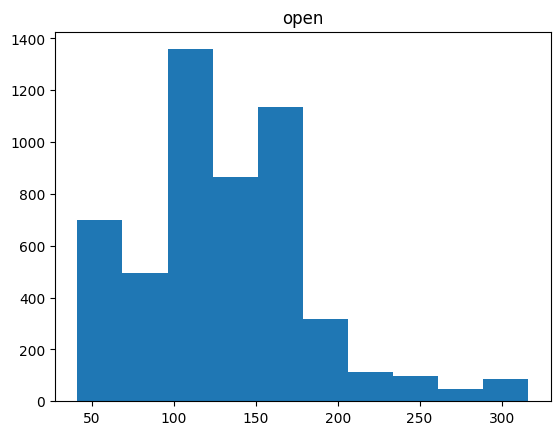

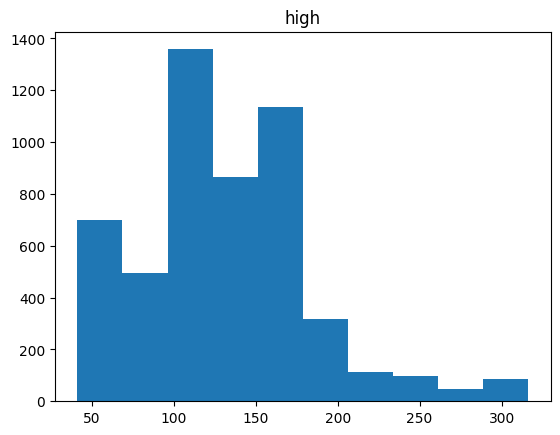

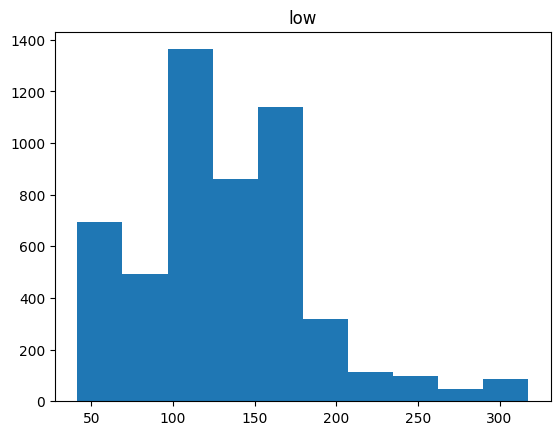

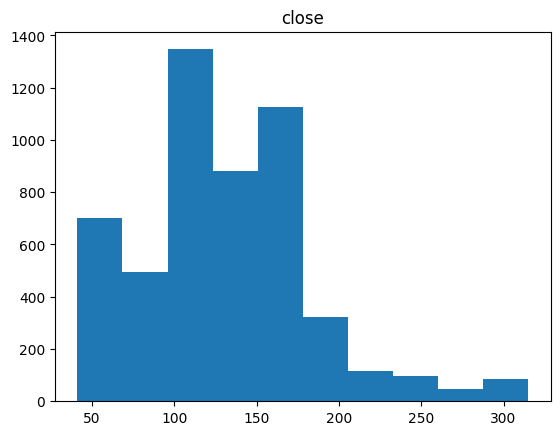

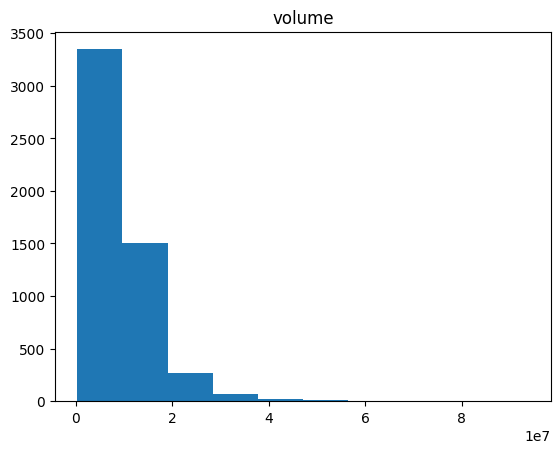

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in ['open', 'high', 'low', 'close', 'volume']:
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

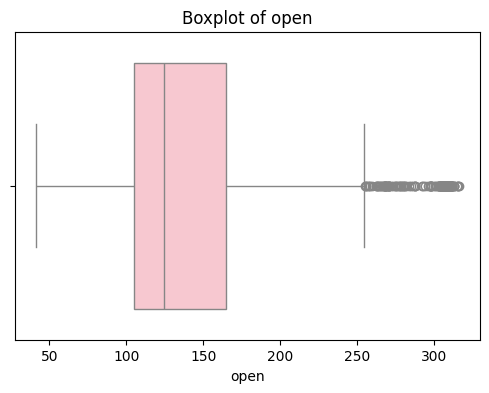

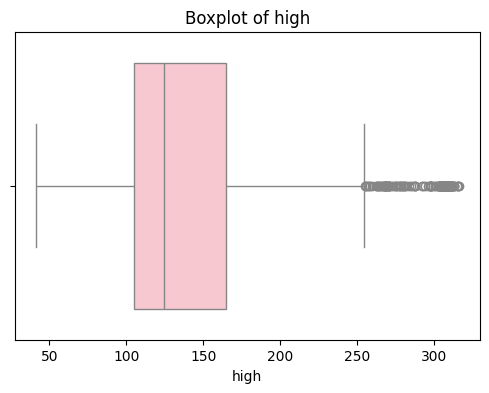

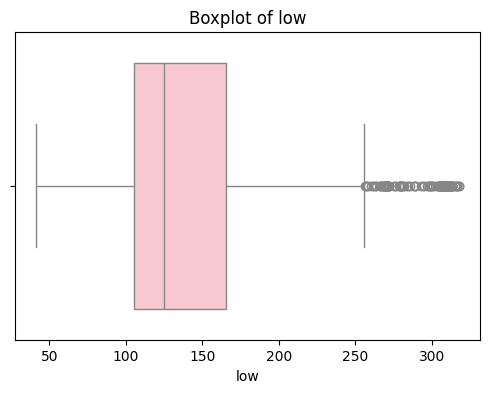

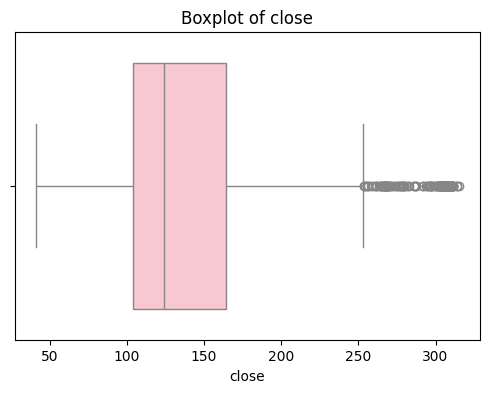

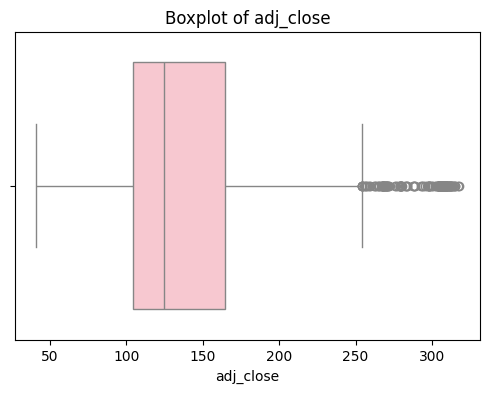

In [10]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\dnson\\Downloads\\gold_price_data.csv')
features = ['open', 'high', 'low', 'close', 'adj_close']
import matplotlib.pyplot as plt
import seaborn as sns
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="pink")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

               open      high       low     close  adj_close
open       1.000000  1.000000  0.999911  0.999920   0.999823
high       1.000000  1.000000  0.999911  0.999920   0.999823
low        0.999911  0.999911  1.000000  0.999864   0.999919
close      0.999920  0.999920  0.999864  1.000000   0.999894
adj_close  0.999823  0.999823  0.999919  0.999894   1.000000


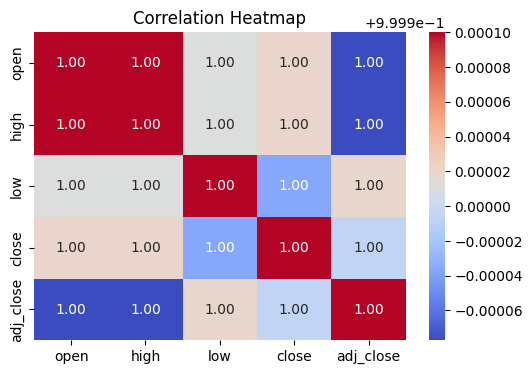

In [36]:
corr_matrix = df[features].corr()
print(corr_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MSE: 0.3086716613044476
RMSE: 0.5555822723093742
R2: 0.9998876529496844


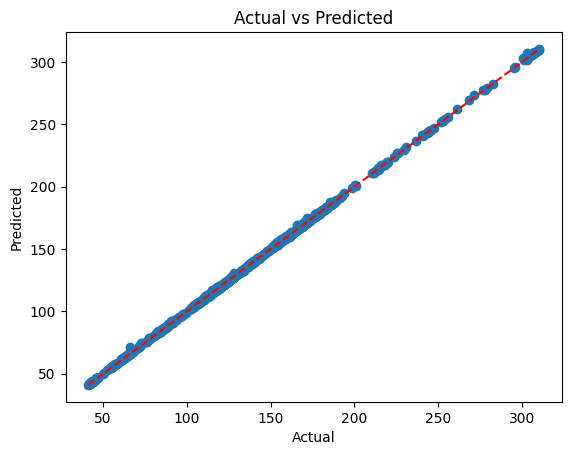

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [26]:
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients)

open      2.870773e-01
high      2.870773e-01
low       4.211453e-01
volume   -5.680927e-08
dtype: float64
